**Q 2 - By Marella Ramana Reddy<br>** <br>
A team of plantation planners are concerned about the yield of oil palm trees, which seems to fluctuate. They have collected a set of data and needed help in analysing on how external factors influence fresh fruit bunch (FFB) yield. Some experts are of opinion that the flowering of oil palm tree determines the FFB yield, and are linked to the external factors. Perform the analysis, which requires some study on the background of oil palm tree physiology.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import missingno as msno
import scipy.stats as st
from xgboost import XGBRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestRegressor

In [33]:
Q2_data = pd.read_csv('palm_ffb.csv')

In [34]:
Q2_data.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [35]:
Q2_data.dtypes

Date              object
SoilMoisture     float64
Average_Temp     float64
Min_Temp         float64
Max_Temp         float64
Precipitation    float64
Working_days       int64
HA_Harvested     float64
FFB_Yield        float64
dtype: object

In [36]:
Q2_data.shape

(130, 9)

In [37]:
Q2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    object 
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


In [38]:
#check if there are any missing or null values. Luckily there is none!
Q2_data.isnull().any()

Date             False
SoilMoisture     False
Average_Temp     False
Min_Temp         False
Max_Temp         False
Precipitation    False
Working_days     False
HA_Harvested     False
FFB_Yield        False
dtype: bool

<span style=color:blue>**Summary**<br>
- Data contains130 rows and 9 coloumns <br>
- All features contain numerical values or continuous data type except one column <br>
- There is no missing values in data

In [39]:
Q2_data.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


In [40]:
Q2_data.var()

SoilMoisture     3.291069e+03
Average_Temp     4.243392e-01
Min_Temp         4.746816e-01
Max_Temp         1.165618e+00
Precipitation    6.438010e+03
Working_days     1.535838e+00
HA_Harvested     1.186175e+09
FFB_Yield        7.938336e-02
dtype: float64

**Distribution studies**

<AxesSubplot:xlabel='FFB_Yield', ylabel='Count'>

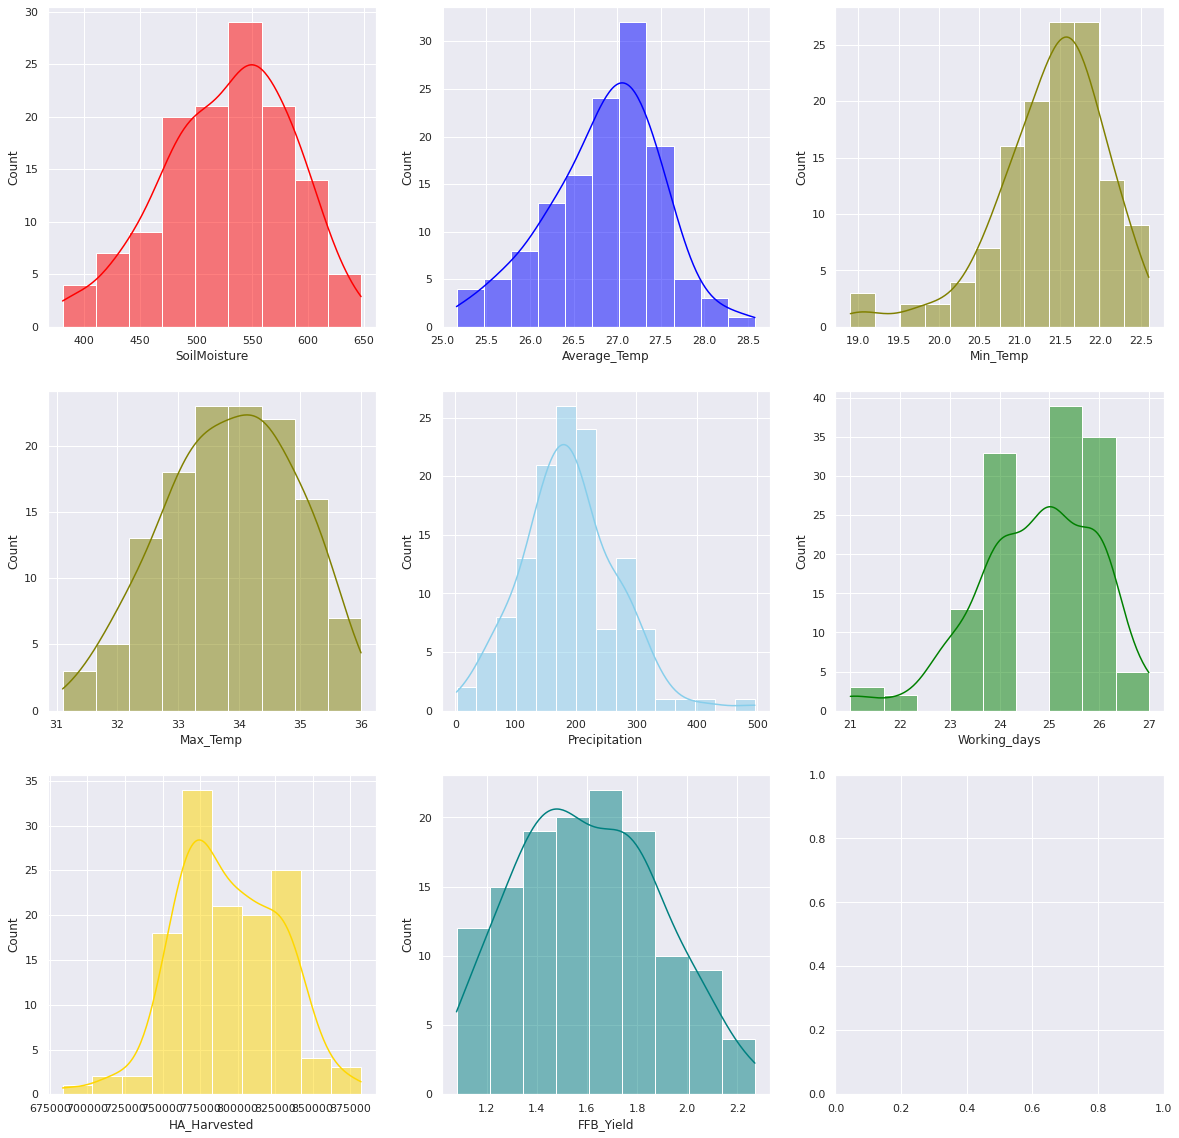

In [41]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

sns.histplot(data=Q2_data, x="SoilMoisture", kde=True, color="red", ax=axs[0, 0])
sns.histplot(data=Q2_data, x="Average_Temp", kde=True, color="blue", ax=axs[0, 1])
sns.histplot(data=Q2_data, x="Min_Temp", kde=True, color="olive", ax=axs[0, 2])
sns.histplot(data=Q2_data, x="Max_Temp", kde=True, color="olive", ax=axs[1, 0])
sns.histplot(data=Q2_data, x="Precipitation", kde=True, color="skyblue", ax=axs[1, 1])
sns.histplot(data=Q2_data, x="Working_days", kde=True, color="green", ax=axs[1, 2])
sns.histplot(data=Q2_data, x="HA_Harvested", kde=True, color="gold", ax=axs[2, 0])
sns.histplot(data=Q2_data, x="FFB_Yield", kde=True, color="teal", ax=axs[2, 1])


In [42]:
d_skew = Q2_data.skew() 
d_kurt = Q2_data.kurt()
frame = { 'Skewness': d_skew, 'Kurtosis': d_kurt }
df_skew_kurt = pd.DataFrame(frame)
df_skew_kurt


,Skewness,Kurtosis
SoilMoisture,-0.394336,-0.262867
Average_Temp,-0.340606,0.141138
Min_Temp,-1.121358,2.000500
Max_Temp,-0.215635,-0.591251
Precipitation,0.526227,1.206761
Working_days,-0.660814,0.565301
HA_Harvested,-0.064445,0.085981
FFB_Yield,0.188629,-0.670960


<span style=color:blue>**Summary**<br>
- min_temp is slightly skewed to the left(negatively skewed)

<AxesSubplot:ylabel='FFB_Yield'>

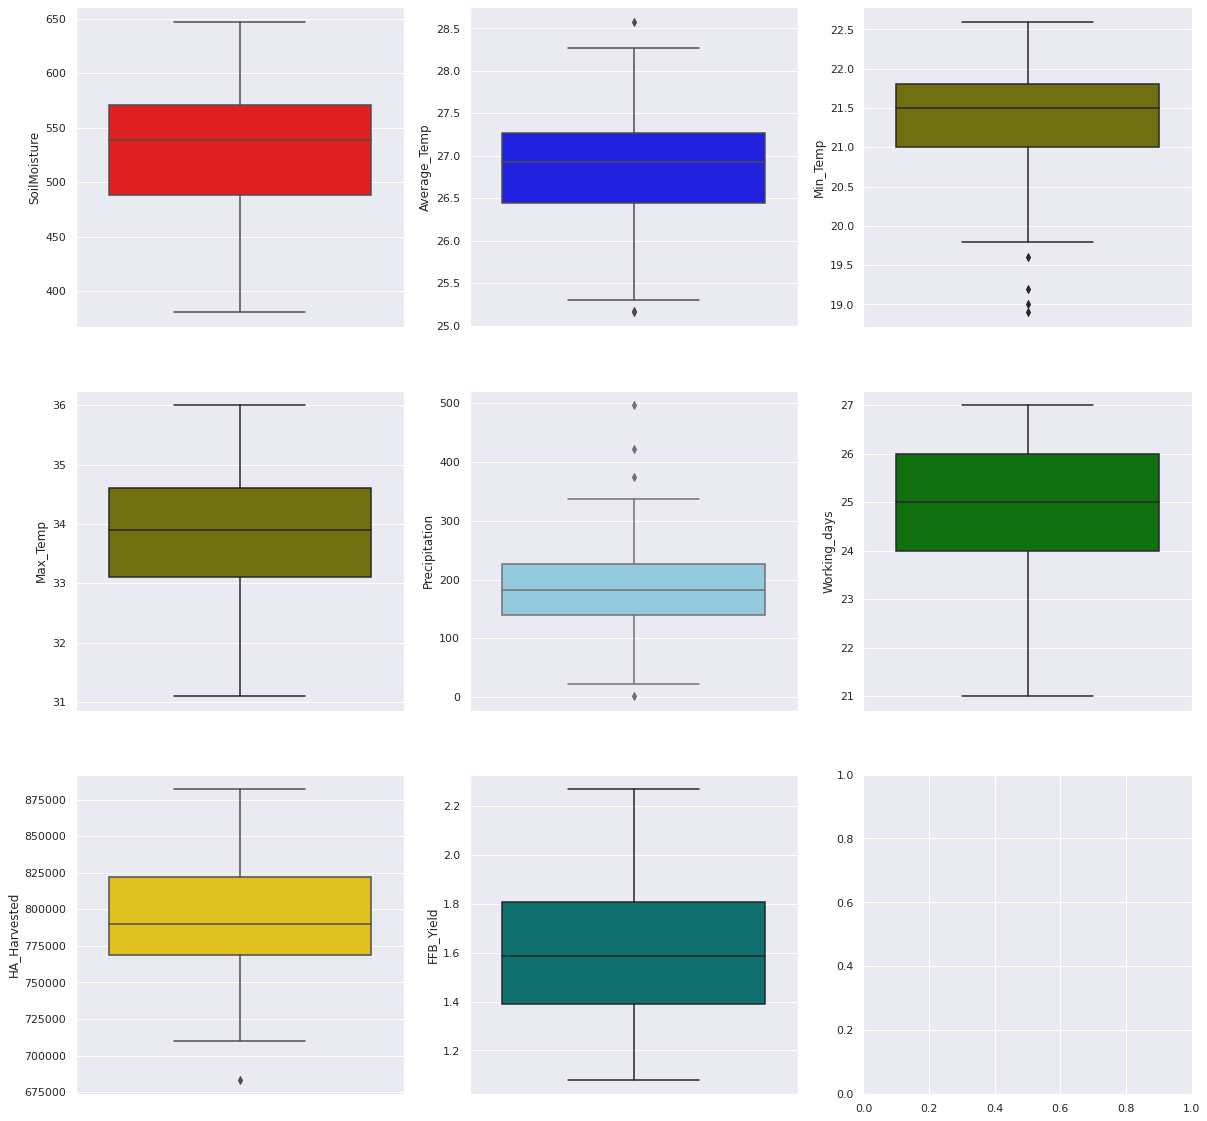

In [43]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

sns.boxplot(data=Q2_data, y="SoilMoisture", color="red", ax=axs[0, 0])
sns.boxplot(data=Q2_data, y="Average_Temp",  color="blue", ax=axs[0, 1])
sns.boxplot(data=Q2_data, y="Min_Temp",  color="olive", ax=axs[0, 2])
sns.boxplot(data=Q2_data, y="Max_Temp",  color="olive", ax=axs[1, 0])
sns.boxplot(data=Q2_data, y="Precipitation",  color="skyblue", ax=axs[1, 1])
sns.boxplot(data=Q2_data, y="Working_days",  color="green", ax=axs[1, 2])
sns.boxplot(data=Q2_data, y="HA_Harvested",  color="gold", ax=axs[2, 0])
sns.boxplot(data=Q2_data, y="FFB_Yield",  color="teal", ax=axs[2, 1])

<span style=color:blue>**Summary**<br>
- There are  features Average temp ,Min temp and prcecipitation contains outlier 
- Reveiw the data for ensure no mistakes and for prcoeeed for further insights 

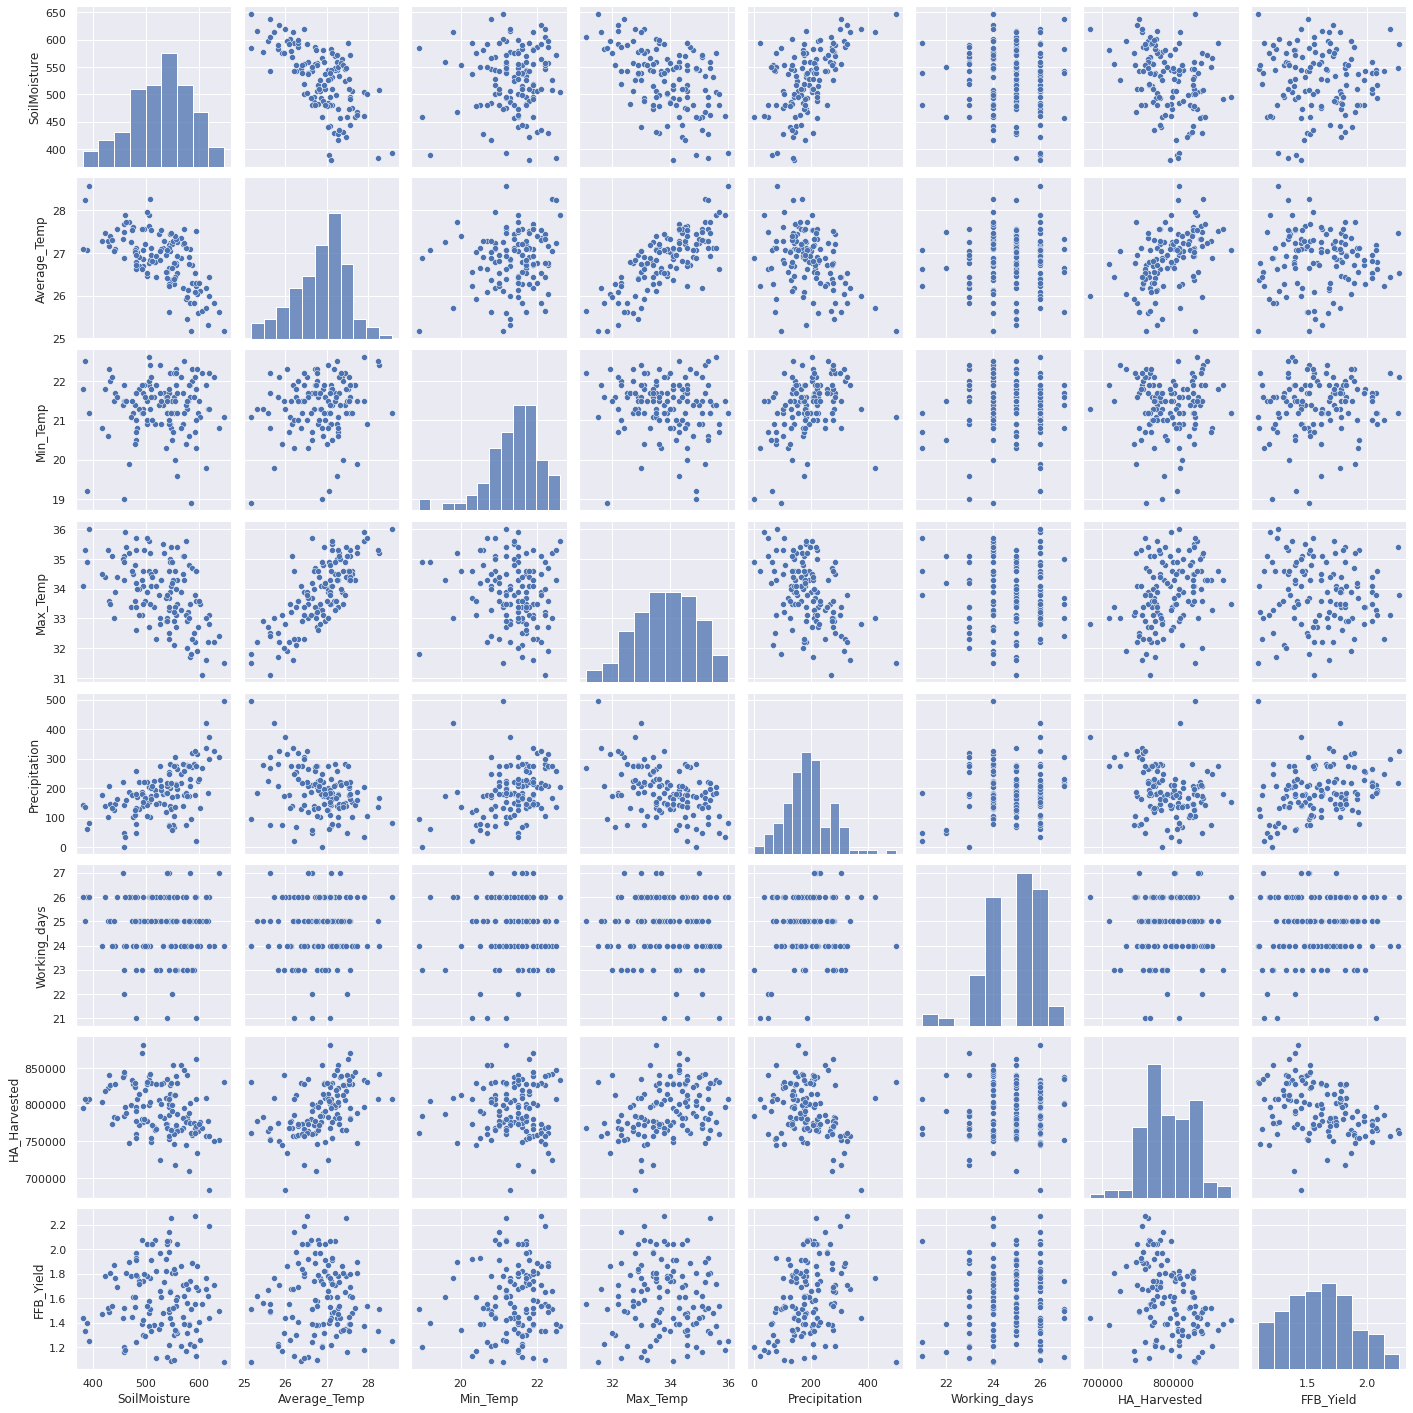

In [44]:
sns.pairplot(Q2_data)

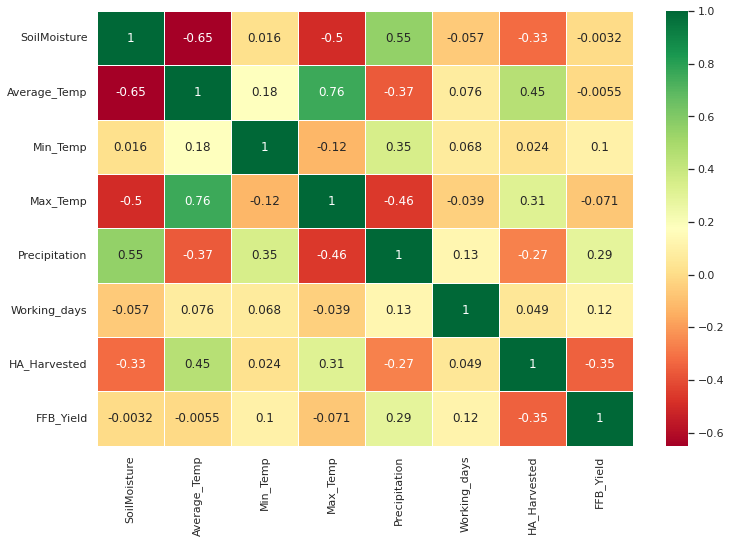

In [45]:
#Using Pearson Correlation
sns.heatmap(Q2_data.corr(),annot=True,cmap='RdYlGn',linewidths=1) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

<span style=color:blue>**Summary**<br>
- Now from the above heatmap,we can see that the features precipitation and soil moisture are highly correlated. So we may delete one of them if we were to perfrom any machine learning.
- FFB Yield shows strong negative correlation with HA_Harvested and strong positive correlation with min_temp, working days and precipitation.

<span style=color:Red>**Feature Selection**

In [46]:
Q2_data.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [47]:
X = Q2_data.drop(['FFB_Yield','Date'],axis=1)  #independent columns
y = Q2_data.FFB_Yield    #target column i.e FFB_Yield

**XGBRessor to fit the model and see what features contributes the most to get higher accuracies**

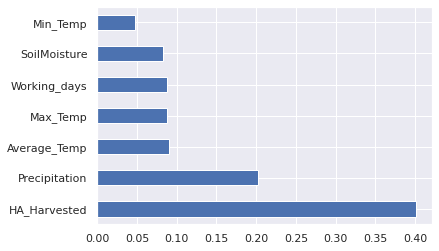

               Importance
HA_Harvested     0.401089
Precipitation    0.202245
Average_Temp     0.089838
Max_Temp         0.088009
Working_days     0.087854
SoilMoisture     0.082905
Min_Temp         0.048060


In [48]:
xgb = XGBRegressor()
xgb.fit(X, y)
imp = pd.DataFrame(xgb.feature_importances_ ,columns = ['Importance'],index = X.columns)
imp = imp.sort_values(['Importance'], ascending = False)

feat_importances = pd.Series(xgb.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

print(imp)

<span style=color:blue>**Summary**<br>
- HA_Harvested, Precipitation, Min_Temp are still standing strong. Working_days is out and Average_Temp is in the team.

In [49]:
#k_features=10 (It will get top 10 features best suited for prediction)
#forward=True (Forward feature selection model)
#verbose=2 (It will show details output as shown below.)
#cv=5 (Kfold cross valiation: it will split the training set in 5 set and 4 will be using for training the model and 1 will using as validation)
#n_jobs=-1 (Number of cores it will use for execution.-1 means it will use all the cores of CPU for execution.)
#scoring='r2'(R-squared is a statistical measure of how close the data are to the fitted regression line)
model=sfs(RandomForestRegressor(),k_features=4,forward=True,verbose=2,cv=5,n_jobs=-1,scoring='r2')
model.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    4.2s finished

[2022-06-06 13:45:01] Features: 1/4 -- score: -0.14399376472699044[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    2.3s finished

[2022-06-06 13:45:03] Features: 2/4 -- score: -0.196984415309863[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished

[2022-06-06 13:45:05] Features: 3/4 -- score: 0.07200219728812221[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.6s finished

[2022-06-06 13:45:07] Features: 4/4 -- score: 0.228

SequentialFeatureSelector(estimator=RandomForestRegressor(), k_features=4,
                          n_jobs=-1, scoring='r2', verbose=2)

In [50]:
#Get the selected feature index.
model.k_feature_idx_

(0, 4, 5, 6)

In [51]:
#Get the column name for the selected feature.
model.k_feature_names_

('SoilMoisture', 'Precipitation', 'Working_days', 'HA_Harvested')

In [52]:
#k_features=4 (It will get top 10 features best suited for prediction)
#forward=False (Backward feature selection model)
#verbose=2 (It will show details output as shown below.)
#cv=5 (Kfold cross valiation: it will split the training set in 5 set and 4 will be using for training the model and 1 will using as validation)
#n_jobs=-1 (Number of cores it will use for execution.-1 means it will use all the cores of CPU for execution.)
#scoring='r2'(R-squared is a statistical measure of how close the data are to the fitted regression line)
backwardModel=sfs(RandomForestRegressor(),k_features=4,forward=False,verbose=2,cv=5,n_jobs=-1,scoring='r2')
#We will convert our training data into numpy array. If we will not convert it, model is not able to read some of the column names. 
backwardModel.fit(np.array(X),y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    3.3s finished

[2022-06-06 13:45:11] Features: 6/4 -- score: 0.2577726351897089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    2.9s finished

[2022-06-06 13:45:14] Features: 5/4 -- score: 0.2815840663491044[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished

[2022-06-06 13:45:17] Features: 4/4 -- score: 0.284607841215069

SequentialFeatureSelector(estimator=RandomForestRegressor(), forward=False,
                          k_features=4, n_jobs=-1, scoring='r2', verbose=2)

In [53]:
#Get the selected feature index.
backwardModel.k_feature_idx_

(0, 2, 4, 6)

In [54]:
#Get the column name for the selected feature.
X.columns[list(backwardModel.k_feature_idx_)]

Index(['SoilMoisture', 'Min_Temp', 'Precipitation', 'HA_Harvested'], dtype='object')


<span style=color:blue>**Summary**<br>
- Soil Moisture and Working_days are part of the best feature team together with Precipitaion, Min_Temp and HA_Harvested.

<span style=color:blue>**Linear Regression model with selected variable**<br>

In [55]:
X_features= Q2_data[['SoilMoisture','Min_Temp','Precipitation','Working_days','HA_Harvested']]
Y_target= Q2_data[['FFB_Yield']]

In [56]:
X_features.head()

,SoilMoisture,Min_Temp,Precipitation,Working_days,HA_Harvested
0,616.4,21.3,184.4,25,777778.3951
1,568.9,20.9,140.2,23,767988.2759
2,577.6,21.3,280.4,25,783951.9231
3,581.1,20.6,173.3,25,788987.0504
4,545.4,20.9,140.6,25,813659.7222


In [57]:
Y_target.head()

,FFB_Yield
0,1.62
1,1.45
2,1.56
3,1.39
4,1.44


In [58]:
from sklearn.model_selection import train_test_split
X_features_train, X_features_test, Y_target_train, Y_target_test = train_test_split( X_features, Y_target, test_size=0.2, random_state=0)

In [59]:
from sklearn.linear_model import LinearRegression


In [60]:
import statsmodels.api as sm
X_features_train_lm = sm.add_constant(X_features_train)

lr_1 = sm.OLS(Y_target_train, X_features_train_lm).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              FFB_Yield   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     5.174
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           0.000296
Time:                        13:45:17   Log-Likelihood:                -1.2756
No. Observations:                 104   AIC:                             14.55
Df Residuals:                      98   BIC:                             30.42
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.4744      1.300      2.673      0.009       0.895       6.054
SoilMoisture     -0.0013      0.001     -2.298      0.024      -0.002      -0.000
Min_Temp          0.0073      0.041      0.179      0.858      -0.074       0.088
Precipitation     0.0011      0.000      2.680      0.009       0.000       0.002
Working_days      0.0177      0.020      0.879      0.382      -0.022       0.058
HA_Harvested  -2.512e-06   7.89e-07     -3.182      0.002   -4.08e-06   -9.45e-07
==============================================================================
Omnibus:                        0.219   Durbin-Watson:                   2.249
Prob(Omnibus):                  0.896   Jarque-Bera (JB):                0.401
Skew:                          -0.011   Prob(JB):                        0.818
Kurtosis:                       2.697   Cond. No.                     4.18e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.18e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R^2 is 20.9% i.e  variation in Target variables explaind only 21% by the features . and there are othe factors influncing y. As R^2 20.9% the model may not be a good to use. But practical scanerio .. as mentioend features have some influence on target variable let's further evolve  for other variable which influnce Yield

